# PCA using Python (scikit-learn)

- PCA for Data Visualization
- PCA to Speed-up Machine Learning Algorithms

## PCA for Data Visualization

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

### Load Iris Dataset

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [5]:
data_iris = datasets.load_iris(as_frame=True)
data_iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use **StandardScaler** to help you standardize the dataset's features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the [effect of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [13]:
# Standardizing the features
x = StandardScaler().fit_transform(data_iris.data)
x = pd.DataFrame(x, columns=data_iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### PCA Projection to 2D

The original data has 4 columns. In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should be note that after dimensionality reduction, there usually isn't a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [14]:
from sklearn.decomposition import PCA


In [17]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
  data=principalComponents,
  columns=['principal component 1', 'principal component 2']
)
principalDf

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


## 理解 PCA

> References:
> - [Principal Component Analysis with Python Examples -- Tutorial](https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa)

为了更好的理解 PCA, 下面手工编写 PCA 算法, 仍然采用 iris 数据集作为样例.

In [26]:
# 数据
x = data_iris.data.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
# 对特征进行标准化
# 这里我们使用 sklearn 提供的 StandardScaler
# StandardScaler 是将数据进行 z-score 计算
# 即, z-score = (x - mean) / standard deviation
# 标准化后, 每个特征的均值等于 0, 方差等于 1
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [33]:
# 我们来验证一下特征标准化后是否均值和方差分别是 0 和 1
np.mean(x, axis=0), np.var(x, axis=0)

(array([ 4.73695157e-17, -4.73695157e-17,  9.47390314e-17,  4.73695157e-17]),
 array([1., 1., 1., 1.]))

In [34]:
# 计算每列的均值
mean = np.mean(x, axis=0)
mean

array([ 4.73695157e-17, -4.73695157e-17,  9.47390314e-17,  4.73695157e-17])

In [36]:
# 协方差矩阵
# rowvar 参数默认值是 True
#   True: 表示行(row)作为变量, 列作为观察结果
#         这里的"变量"指的是特征, 比如: 身高, 年龄
#         "观察结果"指的是样本, 比如: 第 1 个人, 第 2 个人
#   False: 表示列作为变量, 行作为观察结果
# 这里设置为 False 是很明显的, 其实我们处理的大部分数据都是
# 一行表示一个样本, 每列表示一个变量(也就是通常我们说的特征或字段)
cov_matrix = np.cov(x - mean, rowvar=False)
cov_matrix


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [38]:
# 协方差矩阵的特征值和特征向量
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values, eigen_vectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [39]:
# 转置协方差矩阵的特征向量
eigen_vectors = eigen_vectors.T
eigen_vectors

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [41]:
# 从大到小的排列特征值数组的索引
sorted_components = np.argsort(eigen_values)[::-1]
sorted_components

array([0, 1, 2, 3])

In [47]:
# 主成分量. 可以理解为需要降维的维度
# 比如: 这里设置为 2, 表示将原数据集的 4 维降到 2 维
n_components = 2
# 映射矩阵
# 从下面的代码来理解"映射矩阵"
# 映射矩阵就是从特征向量矩阵中取特征值最大的特征向量
projection_matrix = eigen_vectors[sorted_components[:n_components]]
projection_matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199]])

In [56]:
# 解释方差
# 看起来就是按协方差矩阵的特征值进行了从大到小的排序
# 这里需要理解的是, 特征值表示了其对应的特征向量保留了多少信息
# 结合下面的"解释方差率"能够更好的理解
explained_variance = eigen_values[sorted_components]
explained_variance

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [59]:
# 解释方差率
# 从计算结果看, 可以这么理解:
#   第一个特征向量保留了 72.96% 信息量
#   第二个特征向量保留了 22.85% 信息量
# 那么如上面我们设置的 n_components = 2 表示取两个最大的向量
# 就是说通过 PCA 降维操作, 我们从 4 维降到 2 维能够保留 95.81% 的信息量
explained_variance_ratio = explained_variance / eigen_values.sum()
explained_variance_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [65]:
# PCA 降维
# 通常在 PCA 模型中这个操作称之为 transform
# 这里原始的数据集是 (150, 4) 点乘 映射矩阵的转置矩阵 (4, 2) 
# 得到矩阵是 (150, 2)
x_dimensionality_reduction = np.dot(x - mean, projection_matrix.T)
x_dimensionality_reduction

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

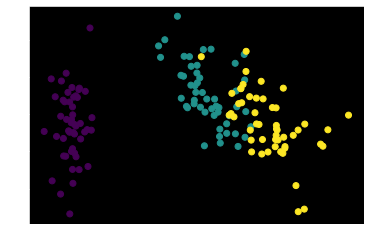

In [67]:
plt.scatter(
  x_dimensionality_reduction[:, 0],
  x_dimensionality_reduction[:, 1],
  c=data_iris.target.values
)